In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Models.VGG import VGG16

In [3]:
import Utils.Dataset as ds
import Utils.utils as utils

In [4]:
image_classes_paths, classes = utils.get_classes_and_paths()
print(f'Image Classes Paths: {image_classes_paths}\nClasses: {classes}')

Image Classes Paths: ['/Users/Andrew/ml/ImageRecognitionOOTB/Data/LilUziVert', '/Users/Andrew/ml/ImageRecognitionOOTB/Data/Kanye', '/Users/Andrew/ml/ImageRecognitionOOTB/Data/TravisScott']
Classes: ['LilUziVert', 'Kanye', 'TravisScott']


# TODO: Create train and test set w/ indicies
# TODO: Change test set and test loader to the different indicies

In [6]:
train_set = ds.DataSetCreator(image_classes_paths)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
dataiter = iter(train_loader)
images, labels = dataiter.next()

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeou

In [7]:
test_set = ds.DataSetCreator(image_classes_paths, augment=False)
test_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

In [8]:
data_loaders = {'train': train_loader, 'test': test_loader}
print(len(train_loader.dataset))
print(len(test_loader))

27
7


In [9]:
test_set = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


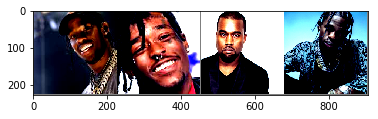

TravisScott LilUziVert Kanye TravisScott


In [10]:
utils.show_image(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[int(labels[j].item())] for j in range(4)))

In [11]:
net = VGG16(len(classes), data_loaders)
print(net.net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [12]:
outputs = net.test(images)
print(outputs)

tensor([[-0.4086,  0.5923, -0.2535],
        [-0.1340,  0.2597,  0.0947],
        [-0.0034,  0.3126,  0.0952],
        [-0.1407,  0.3205, -0.5293]], grad_fn=<ThAddmmBackward>)


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
net.to(device)

if torch.cuda.is_available():
    net = torch.nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss().cuda()
    dtype = torch.cuda.FloatTensor

else:
    criterion = nn.CrossEntropyLoss()
    dtype = torch.FloatTensor

optimizer = optim.Adam(net.net.parameters())

# Error w/ loss

In [15]:
net.train(criterion, optimizer, num_epochs=5)


Epoch: 1/5
TRAIN
Percent: [██████████████████████████████ 100.0% 7/7] Loss: 2.1849081781175403, Accuracy: 0.4074074074074074
TEST
Percent: [██████████████████████████████ 100.0% 7/7] Loss: 8.19477293226454, Accuracy: 0.5555555555555556

Epoch: 2/5
TRAIN
Percent: [██████████████████████████████ 100.0% 7/7] Loss: 1.366036229663425, Accuracy: 0.5185185185185185
TEST
Percent: [██████████████████████████████ 100.0% 7/7] Loss: 8.78717185832836, Accuracy: 0.5925925925925926

Epoch: 3/5
TRAIN
Percent: [████                           14.29% 1/7] 

Process Process-12:
Process Process-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(time

RuntimeError: DataLoader worker (pid 24824) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

In [ ]:
plt.plot(net.loss_history)